In [2]:
from Climate_analysis import *

# Load Calibration results


In [3]:
calval_paramsets = pd.read_csv('Data/ThunderCreek/calval_results.csv', index_col=0)#.loc[calibration_results['ED'].isin(calibration_results.ED.nsmallest(20))]

In [4]:
calibration_simulations = pd.read_csv('Data/ThunderCreek/Simulations/HBVmountain_ERA5_simulations_1986_2004.csv', index_col=0, parse_dates=True)
calibration_evaporation = pd.read_csv('Data/ThunderCreek/Simulations/HBVmountain_ERA5_evaporation_1986_2004.csv', index_col=0, parse_dates=True)

# Run Climate Simulations

In [231]:
path_to_shapefile = 'Data/ThunderCreek/Shapes/Thundercreek.shp' #Catchment shapefile from GRDC
path_to_dem = 'Data/ThunderCreek/dem_thundercreek_full.tif' #DEM tiles over the catchment area
path_to_nlcd = 'Data/ThunderCreek/landuse_thundercreek.tif' 

### Use single model

In [232]:
str_path_input_forcing_ssp245 = 'Data/ThunderCreek/CMIP6/ssp245/HBVmountain_GFDL-CM4_ThunderCreek_2067_2100_ssp245.nc'
str_path_input_forcing_ssp585 = 'Data/ThunderCreek/CMIP6/ssp585/HBVmountain_GFDL-CM4_ThunderCreek_2067_2100_ssp585.nc'
str_path_calibration_forcing = 'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc'
str_path_input_hist_forcing = 'Data/ThunderCreek/CMIP6/hist/HBVmountain_GFDL-CM4_ThunderCreek_1975_2005.nc'

In [234]:
sim_GFDL_CM4_hist = run_climate_simulations_biascorrected(calval_paramsets, str_path_input_hist_forcing ,str_path_calibration_forcing, str_path_input_hist_forcing
                                                         , path_to_shapefile, path_to_dem, path_to_nlcd)
sim_GFDL_CM4_hist.to_csv('Data/ThunderCreek/Simulations/CMIP6/streamflow_simulations_GFDL-CM4_thundercreek_hist_bc.csv')

sim_GFDL_CM4_ssp245 = run_climate_simulations_biascorrected(calval_paramsets, str_path_input_forcing_ssp245, str_path_input_hist_forcing, str_path_input_hist_forcing
                                                           , path_to_shapefile, path_to_dem, path_to_nlcd)
sim_GFDL_CM4_ssp245.to_csv('Data/ThunderCreek/Simulations/CMIP6/streamflow_simulations_GFDL-CM4_thundercreek_ssp245_bc.csv')

sim_GFDL_CM4_ssp585 = run_climate_simulations_biascorrected(calval_paramsets, str_path_input_forcing_ssp585, str_path_input_hist_forcing, str_path_input_hist_forcing
                                                           , path_to_shapefile, path_to_dem, path_to_nlcd)
sim_GFDL_CM4_ssp585.to_csv('Data/ThunderCreek/Simulations/CMIP6/streamflow_simulations_GFDL-CM4_thundercreek_ssp585_bc.csv')

### Loop through all models

In [235]:
def all_simulations_in_folder(path_to_scenario, path_to_historical, path_to_era5, start_name, end_name,  path_to_shapefile, path_to_dem, path_to_nlcd):
    """
    Runs all simulations in given folder. Returns dictionary containing dataframes per CMIP6 model

    """
    dicts = {}
    for i in range(len(os.listdir(path_to_scenario))):
        f_hist = os.path.join(path_to_historical, os.listdir(path_to_historical)[i]) 
        f = os.path.join(path_to_scenario, os.listdir(path_to_scenario)[i])

        if os.path.isfile(f):
            name = (f[f.find(start_name)+len(start_name):f.rfind(end_name)])
            dfhist_bc = run_climate_simulations_biascorrected(calval_paramsets, str(f), 
                                                              path_to_era5, str(f_hist), path_to_shapefile, path_to_dem, path_to_nlcd)
            dicts[name] = dfhist_bc
    return dicts

In [236]:
directory_hist = 'Data/ThunderCreek/CMIP6/hist'
directory_ssp245 = 'Data/ThunderCreek/CMIP6/ssp245' 
directory_ssp585 = 'Data/ThunderCreek/CMIP6/ssp585' 
path_to_era5 = 'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc'

start_name = 'HBVmountain_'
end_name = '_ThunderCreek' #Change this name for another catchment

In [237]:
sim_all_models_hist_raw = all_simulations_in_folder(directory_hist, directory_hist, 'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc', 
                                                start_name, end_name, path_to_shapefile, path_to_dem, path_to_nlcd)
sim_all_models_ssp245_raw = all_simulations_in_folder(directory_ssp245, directory_hist, 'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc', 
                                                  start_name, end_name, path_to_shapefile, path_to_dem, path_to_nlcd)
sim_all_models_ssp585_raw = all_simulations_in_folder(directory_ssp585, directory_hist, 'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc',
                                                  start_name, end_name, path_to_shapefile, path_to_dem, path_to_nlcd)

# Load observation and forcing

In [241]:
shapefile_catchment = gpd.read_file('Data/ThunderCreek/Shapes/Thundercreek.shp')
area_catchment = shapefile_catchment.area_hys.values[0]
observation = pd.read_csv('Data/ThunderCreek/Discharge_ThunderCreek.csv', index_col=0) /(area_catchment * 1e6) * 1000 *86400
observation.index = pd.to_datetime(observation.index)
daily_observation = observation.groupby(observation.index.strftime("%m-%d")).mean()

observation.head(10)

streamflow
time                  
1986-01-01    0.945439
1986-01-02    0.954176
1986-01-03    0.936702
1986-01-04    0.927653
1986-01-05    0.927653
1986-01-06    0.945439
1986-01-07    0.918917
1986-01-08    0.954176
1986-01-09    0.936702
1986-01-10    0.980698

In [242]:
def all_forcing_in_folder(path_to_forcing, start_name, end_name):
    """
    Converts all forcing in folder into dictionary containing dataframes
    """
    cmip6_forcing = {}
    for i in range(len(os.listdir(path_to_forcing))):
        f = os.path.join(path_to_forcing, os.listdir(path_to_forcing)[i])

        if os.path.isfile(f):
            name = (f[f.find(start_name)+len(start_name):f.rfind(end_name)])
            forcing_netcdf = nc.Dataset(f)
            forcing = generate_forcing_from_NETCDF(forcing_netcdf)
            cmip6_forcing[name] = forcing
    return cmip6_forcing

In [243]:
directory_hist = 'Data/ThunderCreek/CMIP6/hist'
directory_ssp245 = 'Data/ThunderCreek/CMIP6/ssp245' 
directory_ssp585 = 'Data/ThunderCreek/CMIP6/ssp585' 

forcing_hist = all_forcing_in_folder(directory_hist, start_name, end_name)
forcing_ssp245 = all_forcing_in_folder(directory_ssp245, start_name, end_name)
forcing_ssp585 = all_forcing_in_folder(directory_ssp585, start_name, end_name)

### Calculate rolling 7 day mean

In [244]:
def rolling_mean(streamflow_dict):
    """
    Calculates rolling 7-day mean of the streamflow data
    """
    for i in list(streamflow_dict.keys()):
        streamflow_dict[i] = pd.DataFrame(streamflow_dict[i].rolling(window=7).mean())
    return streamflow_dict

In [245]:
observation = pd.DataFrame(observation['streamflow'].rolling(window=7).mean())
sim_all_models_hist = rolling_mean(sim_all_models_hist_raw)
sim_all_models_ssp245 = rolling_mean(sim_all_models_ssp245_raw)
sim_all_models_ssp585 = rolling_mean(sim_all_models_ssp585_raw)


# Analysis

### Daily mean streamflow

In [211]:
def daily_mean_streamflow(simulation_dictionary):
    """
    Returns daily mean streamflow of all parameter sets.
    """
    sim_daily_streamflow = {}
    for i in range(len(simulation_dictionary)):
        sim_daily_streamflow[list(simulation_dictionary.keys())[i]] = list(simulation_dictionary.values())[i].groupby(list(simulation_dictionary.values())[i].index.strftime("%m-%d")).mean()
    return sim_daily_streamflow


Text(0.5, 1.0, 'Thunder Creek, SSP585')

<Figure size 432x216 with 0 Axes>

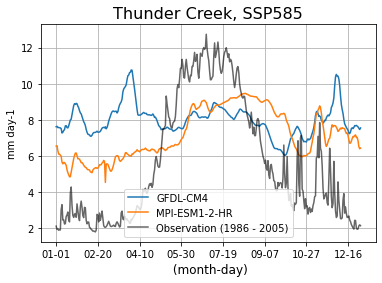

In [212]:
plt.figure(figsize=[6,3])
daily_simulations_all_ssp585 = daily_mean_streamflow(sim_all_models_ssp585)
all_models_mean_paramsets_ssp585 = pd.DataFrame(index=list(daily_simulations_all_ssp585.values())[0].index)
for i in range(len(daily_simulations_all_ssp585)):
    all_models_mean_paramsets_ssp585[list(daily_simulations_all_ssp585.keys())[i]] = list(daily_simulations_all_ssp585.values())[i].mean(axis=1)


all_models_mean_paramsets_ssp585.plot() #['GFDL-CM4'].plot(color='r', label='GFDL-CM4, Bias corrected')
daily_observation.mean(axis=1).plot(color='k', alpha=0.6, label='Observation (1986 - 2005)')
plt.legend()
plt.grid()
plt.ylabel('mm day-1')
plt.xlabel(' (month-day)', fontsize=12)
plt.title('Thunder Creek, SSP585', fontsize=16)

### Modelled streamflow specific year

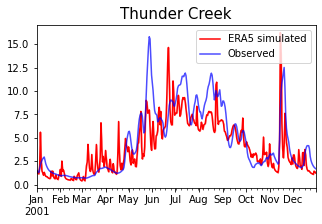

In [213]:
plt.figure(figsize=[5,3])
sim_2001 = calibration_simulations.loc[calibration_simulations.index.year == 2001]
obs_2001 = observation.loc[observation.index.year == 2001]

sim_2001.mean(axis=1).plot(color='r', label='ERA5 simulated')
obs_2001.mean(axis=1).plot(color='b', label='Observed', alpha=0.7)
plt.fill_between(sim_2001.index, sim_2001.min(axis=1), sim_2001.max(axis=1), color='r', alpha=0.3) #In case of more parametersets
# plt.ylabel('mm day-1', fontsize=13)
plt.title('Thunder Creek', fontsize=15)
plt.xlabel('')
plt.legend()

### Boxplots of monthly total streamflow

In [214]:
def create_monthly_boxplots(simulations_hist, simulations_ssp245, simulations_ssp585):
    """
    Create monthly boxplots of total monthly streamflow over all years for the historical period and ssp245 and ssp585.
    """
    fig, axarr = plt.subplots(figsize=(7,4))

    hist = simulations_hist.groupby(simulations_hist.index.strftime("%y-%m")).sum()
    hist['mean'] = hist.mean(axis=1)
    hist['month'] = hist.index.str[3:]
    hist.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0-0.8, sym='', widths=0.6, color='k')

    ssp245 = simulations_ssp245.groupby(simulations_ssp245.index.strftime("%y-%m")).sum()
    ssp245['mean'] = ssp245.mean(axis=1)
    ssp245['month'] = ssp245.index.str[3:]
    ssp245.boxplot(by='month', column='mean', ax=axarr, sym='', positions=np.array(range(12))*3.0, widths=0.6, color='b')

    ssp585 = simulations_ssp585.groupby(simulations_ssp585.index.strftime("%y-%m")).sum()
    ssp585['mean'] = ssp585.mean(axis=1)
    ssp585['month'] = ssp585.index.str[3:]
    ssp585.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0+0.8, sym='', widths=0.6, color='r')
    
    ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig.suptitle('')
    plt.xticks(range(0, 12 * 3, 3), ticks)

Text(0.5, 0, '')

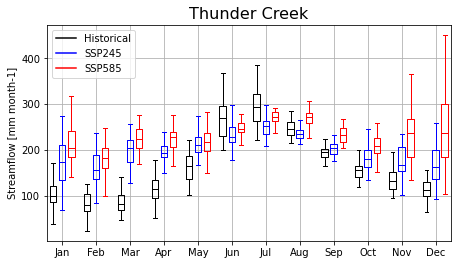

In [215]:
all_models_mean_paramsets_hist = pd.DataFrame(index=list(sim_all_models_hist.values())[0].index)
for i in range(len(sim_all_models_hist)):
    all_models_mean_paramsets_hist[list(sim_all_models_hist.keys())[i]] = list(sim_all_models_hist.values())[i].mean(axis=1)
    
all_models_mean_paramsets_ssp245 = pd.DataFrame(index=list(sim_all_models_ssp245.values())[0].index)
for i in range(len(sim_all_models_ssp245)):
    all_models_mean_paramsets_ssp245[list(sim_all_models_ssp245.keys())[i]] = list(sim_all_models_ssp245.values())[i].mean(axis=1)
    
all_models_mean_paramsets_ssp585 = pd.DataFrame(index=list(sim_all_models_ssp585.values())[0].index)
for i in range(len(sim_all_models_ssp585)):
    all_models_mean_paramsets_ssp585[list(sim_all_models_ssp585.keys())[i]] = list(sim_all_models_ssp585.values())[i].mean(axis=1)

create_monthly_boxplots(all_models_mean_paramsets_hist, all_models_mean_paramsets_ssp245,
                        all_models_mean_paramsets_ssp585)
plt.title('Thunder Creek', fontsize=16)
plt.plot([], 'k', label='Historical')
plt.plot([], 'b', label='SSP245')
plt.plot([], 'r', label='SSP585')
plt.ylabel('Streamflow [mm month-1]')
plt.legend()
plt.xlabel('')

### Relative changes

In [216]:
def relative_change_monthly(reference, future):
    """
    Calculates relative change in monthly data
    """
    months = np.arange(1,13)
    index = np.arange(1,13)
    change = []

    for i in range(len(months)):
        hist = reference.loc[reference.index.month == months[i]].mean(axis=1).sum()
        projection = future.loc[future.index.month == months[i]].mean(axis=1).sum()
        rel_change = (projection-hist) / hist * 100
        change.append([index[i],rel_change])
    return change 

def absolute_change_monthly(reference, future):
    """
    Calculates absolute change in monthly data
    """
    months = np.arange(1,13)
    index = np.arange(1,13)
    change = []

    for i in range(len(months)):
        hist = reference.loc[reference.index.month == months[i]].mean(axis=1).mean()
        projection = future.loc[future.index.month == months[i]].mean(axis=1).mean()
        abs_change = (projection-hist)
        change.append([index[i],abs_change])
    return change 

In [217]:
def forcing_mean_allmodels(forcing_dict):
    """
    Calculates mean of all CMIP6 forcing datasets. Returns dataframe with mean precipitation and dataframe with mean temperature.
    """
    all_models_mean_prec = pd.DataFrame(index=list(forcing_dict.values())[0].index)
    all_models_mean_prec.index = pd.to_datetime(all_models_mean_prec.index)
    for i in range(len(forcing_hist)):
        all_models_mean_prec[list(forcing_dict.keys())[i]] = list(forcing_dict.values())[i].prec
        
    all_models_mean_temp = pd.DataFrame(index=list(forcing_dict.values())[0].index)
    all_models_mean_temp.index = pd.to_datetime(all_models_mean_temp.index)
    for i in range(len(forcing_hist)):
        all_models_mean_temp[list(forcing_dict.keys())[i]] = list(forcing_dict.values())[i].temp
    
    return all_models_mean_prec, all_models_mean_temp
    

In [218]:
all_models_mean_prec_hist, all_models_mean_temp_hist = forcing_mean_allmodels(forcing_hist)
all_models_mean_prec_ssp245, all_models_mean_temp_ssp245 = forcing_mean_allmodels(forcing_ssp245)
all_models_mean_prec_ssp585, all_models_mean_temp_ssp585 = forcing_mean_allmodels(forcing_ssp585)

In [219]:
relative_change_streamflow_ssp245 = relative_change_monthly(all_models_mean_paramsets_hist, all_models_mean_paramsets_ssp245)
relative_change_streamflow_ssp585 = relative_change_monthly(all_models_mean_paramsets_hist, all_models_mean_paramsets_ssp585)

relative_change_prec_ssp245 = relative_change_monthly(all_models_mean_prec_hist, all_models_mean_prec_ssp245)
relative_change_prec_ssp585 = relative_change_monthly(all_models_mean_prec_hist, all_models_mean_prec_ssp585)

abs_change_temp_ssp245 = absolute_change_monthly(all_models_mean_temp_hist, all_models_mean_temp_ssp245)
abs_change_temp_ssp585 = absolute_change_monthly(all_models_mean_temp_hist, all_models_mean_temp_ssp585)

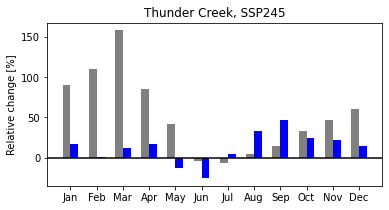

In [220]:
plt.figure(figsize=[6,3])

x1,y1 = zip(*relative_change_streamflow_ssp245)
x2,y2 = zip(*relative_change_prec_ssp245)

plt.bar(np.array(x1)-0.15, y1, width = 0.3, label='Streamflow', color='grey')
plt.bar(np.array(x2)+0.15, y2, width = 0.3, label='Precipitation', color='blue')

plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 

plt.axhline(0, color='k')
plt.title('Thunder Creek, SSP245')
plt.ylabel('Relative change [%]')
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), ticks)

plt.show()

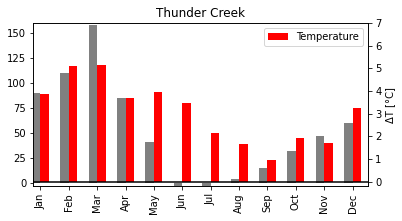

In [221]:
fig = plt.figure(figsize=[6,3]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

pd.DataFrame(relative_change_streamflow_ssp245).iloc[:,1].plot(kind='bar', color='grey', ax=ax, width=width, position=1)
pd.DataFrame(abs_change_temp_ssp245).iloc[:,1].plot(kind='bar', color='r', ax=ax2, width=width, position=0,  label='Temperature')


ax2.set_ylabel('ΔT [°C]')
ax2.set_ylim((-0.2, 7)) #Manually adjested the scales such that Ytemp = Ystreamflow = 0
ax.set_ylim((-3, 160))
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(0, 12), ticks)
plt.axhline(0, color='k')
plt.legend()
plt.title('Thunder Creek')
plt.show()

### Flow Duration Curve

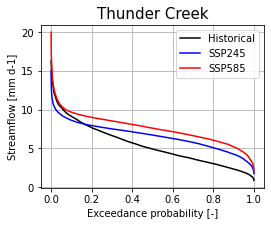

In [222]:
plt.figure(figsize=[4,3])
SortedQ_hist, ExcProb_hist = flowdurationcurve(all_models_mean_paramsets_hist.loc[all_models_mean_paramsets_hist.index.year > all_models_mean_paramsets_hist.index.year[1]].mean(axis=1).values)
SortedQ_ssp245, ExcProb_ssp245 = flowdurationcurve(all_models_mean_paramsets_ssp245.loc[all_models_mean_paramsets_ssp245.index.year > all_models_mean_paramsets_ssp245.index.year[1]].mean(axis=1).values)
SortedQ_ssp585, ExcProb_ssp585 = flowdurationcurve(all_models_mean_paramsets_ssp585.loc[all_models_mean_paramsets_ssp585.index.year > all_models_mean_paramsets_ssp585.index.year[1]].mean(axis=1).values)

plt.plot(ExcProb_hist, SortedQ_hist, color='k', label='Historical')
plt.plot(ExcProb_ssp245, SortedQ_ssp245, color='b', label='SSP245')
plt.plot(ExcProb_ssp585, SortedQ_ssp585, color='r', label='SSP585')


# all_models_mean_paramsets_hist

# plt.xscale('log')
plt.grid()
plt.legend()
plt.ylabel('Streamflow [mm d-1]')
plt.xlabel('Exceedance probability [-]')
plt.title('Thunder Creek', fontsize=15);

### Monthly change temperature and precipitation

In [223]:
relative_change_streamflow_ssp245
abs_change_temp_ssp245

[[1, 3.87066650390625],
 [2, 5.1162989139556885],
 [3, 5.138253808021545],
 [4, 3.6869163513183594],
 [5, 3.978290557861328],
 [6, 3.4626693725585938],
 [7, 2.142608642578125],
 [8, 1.6437397003173828],
 [9, 0.9688973426818848],
 [10, 1.9217033833265305],
 [11, 1.7240402698516846],
 [12, 3.2445948123931885]]

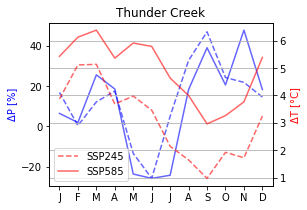

In [224]:
fig = plt.figure(figsize=[4,3]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

plt.plot(pd.DataFrame(relative_change_prec_ssp245).iloc[:,1], color='b', linestyle='--', alpha=0.6)
plt.plot(pd.DataFrame(relative_change_prec_ssp585).iloc[:,1], color='b', alpha=0.6)


ax2=ax.twinx()
ax2.plot(pd.DataFrame(abs_change_temp_ssp245).iloc[:,1],color="r", linestyle='--', alpha=0.6, label='SSP245')
ax2.plot(pd.DataFrame(abs_change_temp_ssp585).iloc[:,1],color="r", alpha=0.6, label='SSP585')

ax2.set_ylabel("ΔT [°C]",color="r")
ax.set_ylabel('ΔP [%]', color='b')
ticks = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
plt.xticks(range(0, 12), ticks)
plt.grid()
plt.legend()
plt.title('Thunder Creek', fontsize=12)
plt.show()

### Change in streamflow extremes

In [225]:
#7 day average flow
all_models_mean_paramsets_hist_7day = all_models_mean_paramsets_hist.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()
all_models_mean_paramsets_ssp245_7day = all_models_mean_paramsets_ssp245.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()
all_models_mean_paramsets_ssp585_7day = all_models_mean_paramsets_ssp585.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()

#### Change in annual minimum flow magnitude

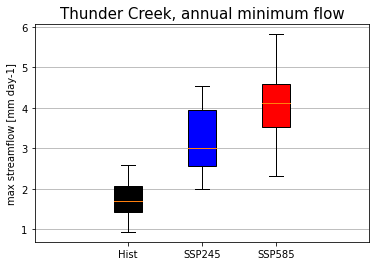

In [226]:
min_hist_7day = all_models_mean_paramsets_hist_7day.loc[all_models_mean_paramsets_hist_7day.index.year> all_models_mean_paramsets_hist_7day.index[0].year].groupby(all_models_mean_paramsets_hist_7day.loc[all_models_mean_paramsets_hist_7day.index.year> all_models_mean_paramsets_hist_7day.index[0].year].index.strftime("%y")).min()
min_ssp245_7day = all_models_mean_paramsets_ssp245_7day.loc[all_models_mean_paramsets_ssp245_7day.index.year> all_models_mean_paramsets_ssp245_7day.index[0].year].groupby(all_models_mean_paramsets_ssp245_7day.loc[all_models_mean_paramsets_ssp245_7day.index.year> all_models_mean_paramsets_ssp245_7day.index[0].year].index.strftime("%y")).min()
min_ssp585_7day = all_models_mean_paramsets_ssp585_7day.loc[all_models_mean_paramsets_ssp585_7day.index.year> all_models_mean_paramsets_ssp585_7day.index[0].year].groupby(all_models_mean_paramsets_ssp585_7day.loc[all_models_mean_paramsets_ssp585_7day.index.year> all_models_mean_paramsets_ssp585_7day.index[0].year].index.strftime("%y")).min()


plt.figure(figsize=[6,4])


bplot1 = plt.boxplot(min_hist_7day, patch_artist=True,  positions=np.array(range(1))*3.0-0.4)
bplot2 = plt.boxplot(min_ssp245_7day, patch_artist=True,  positions=np.array(range(1))*3.0)
bplot3 = plt.boxplot(min_ssp585_7day, patch_artist=True, positions=np.array(range(1))*3.0+0.4)

colors = ['black', 'blue', 'red']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor('black') 
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor('blue') 
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor('red') 
    
ticks = ['Hist', 'SSP245', 'SSP585']
plt.xticks([-0.4, 0, 0.4], ticks)
plt.grid(axis='y')
plt.ylabel('max streamflow [mm day-1]')
plt.title('Thunder Creek, annual minimum flow', fontsize=15);

#### Change in annual maximum flow magnitude

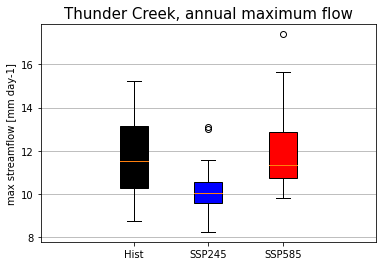

In [227]:
min_hist_7day = all_models_mean_paramsets_hist_7day.loc[all_models_mean_paramsets_hist_7day.index.year> all_models_mean_paramsets_hist_7day.index[0].year].groupby(all_models_mean_paramsets_hist_7day.loc[all_models_mean_paramsets_hist_7day.index.year> all_models_mean_paramsets_hist_7day.index[0].year].index.strftime("%y")).max()
min_ssp245_7day = all_models_mean_paramsets_ssp245_7day.loc[all_models_mean_paramsets_ssp245_7day.index.year> all_models_mean_paramsets_ssp245_7day.index[0].year].groupby(all_models_mean_paramsets_ssp245_7day.loc[all_models_mean_paramsets_ssp245_7day.index.year> all_models_mean_paramsets_ssp245_7day.index[0].year].index.strftime("%y")).max()
min_ssp585_7day = all_models_mean_paramsets_ssp585_7day.loc[all_models_mean_paramsets_ssp585_7day.index.year> all_models_mean_paramsets_ssp585_7day.index[0].year].groupby(all_models_mean_paramsets_ssp585_7day.loc[all_models_mean_paramsets_ssp585_7day.index.year> all_models_mean_paramsets_ssp585_7day.index[0].year].index.strftime("%y")).max()


plt.figure(figsize=[6,4])


bplot1 = plt.boxplot(min_hist_7day, patch_artist=True,  positions=np.array(range(1))*3.0-0.4)
bplot2 = plt.boxplot(min_ssp245_7day, patch_artist=True,  positions=np.array(range(1))*3.0)
bplot3 = plt.boxplot(min_ssp585_7day, patch_artist=True, positions=np.array(range(1))*3.0+0.4)

colors = ['black', 'blue', 'red']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor('black') 
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor('blue') 
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor('red') 
    
ticks = ['Hist', 'SSP245', 'SSP585']
plt.xticks([-0.4, 0, 0.4], ticks)
plt.grid(axis='y')
plt.ylabel('max streamflow [mm day-1]')
plt.title('Thunder Creek, annual maximum flow', fontsize=15);

### Change in annual extreme flow timing

#### Minimum flow

In [228]:
hist_yearly_min = pd.to_datetime(pd.DataFrame(all_models_mean_paramsets_hist_7day.loc[(all_models_mean_paramsets_hist_7day.index.year>all_models_mean_paramsets_hist_7day.index[0].year)]).resample('1y')[0].idxmin().values)
hist_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in hist_yearly_min])
hist_min_doy_stat = [round(stats.circmean(hist_yearly_min_doy, high=365),0), round(stats.circstd(hist_yearly_min_doy, high=365),0)]

ssp245_yearly_min = pd.to_datetime(pd.DataFrame(all_models_mean_paramsets_ssp245_7day.loc[(all_models_mean_paramsets_ssp245_7day.index.year>all_models_mean_paramsets_ssp245_7day.index[0].year)]).resample('1y')[0].idxmin().values)
ssp245_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in ssp245_yearly_min])
ssp245_min_doy_stat = [round(stats.circmean(ssp245_yearly_min_doy, high=365),0), round(stats.circstd(ssp245_yearly_min_doy, high=365),0)]

ssp585_yearly_min = pd.to_datetime(pd.DataFrame(all_models_mean_paramsets_ssp585_7day.loc[(all_models_mean_paramsets_ssp585_7day.index.year>all_models_mean_paramsets_ssp585_7day.index[0].year)]).resample('1y')[0].idxmin().values)
ssp585_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in ssp585_yearly_min])
ssp585_min_doy_stat = [round(stats.circmean(ssp585_yearly_min_doy, high=365), 0), round(stats.circstd(ssp585_yearly_min_doy, high=365), 0)]

print(f'Day of year minimum flow [Mean ,Standard Deviation]')
print(f'Historical: {hist_min_doy_stat:}')
print(f'SSP245: {ssp245_min_doy_stat}')
print(f'SSP585: {ssp585_min_doy_stat}')

Day of year minimum flow [Mean ,Standard Deviation]
Historical: [42.0, 35.0]
SSP245: [364.0, 40.0]
SSP585: [3.0, 48.0]


#### Maximum flow

In [229]:
hist_yearly_max = pd.to_datetime(pd.DataFrame(all_models_mean_paramsets_hist_7day.loc[(all_models_mean_paramsets_hist_7day.index.year>all_models_mean_paramsets_hist_7day.index[0].year)]).resample('1y')[0].idxmax().values)
hist_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in hist_yearly_max])
hist_max_doy_stat = [round(stats.circmean(hist_yearly_max_doy, high=365),0), round(stats.circstd(hist_yearly_max_doy, high=365),0)]

ssp245_yearly_max = pd.to_datetime(pd.DataFrame(all_models_mean_paramsets_ssp245_7day.loc[(all_models_mean_paramsets_ssp245_7day.index.year>all_models_mean_paramsets_ssp245_7day.index[0].year)]).resample('1y')[0].idxmax().values)
ssp245_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in ssp245_yearly_max])
ssp245_max_doy_stat = [round(stats.circmean(ssp245_yearly_max_doy, high=365),0), round(stats.circstd(ssp245_yearly_max_doy, high=365),0)]

ssp585_yearly_max = pd.to_datetime(pd.DataFrame(all_models_mean_paramsets_ssp585_7day.loc[(all_models_mean_paramsets_ssp585_7day.index.year>all_models_mean_paramsets_ssp585_7day.index[0].year)]).resample('1y')[0].idxmax().values)
ssp585_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in ssp585_yearly_max])
ssp585_max_doy_stat = [round(stats.circmean(ssp585_yearly_max_doy, high=365), 0), round(stats.circstd(ssp585_yearly_max_doy, high=365), 0)]

print(f'Day of year maximum flow [Mean ,Standard Deviation]')
print(f'Historical: {hist_max_doy_stat:}')
print(f'SSP245: {ssp245_max_doy_stat}')
print(f'SSP585: {ssp585_max_doy_stat}')

Day of year maximum flow [Mean ,Standard Deviation]
Historical: [177.0, 15.0]
SSP245: [114.0, 156.0]
SSP585: [357.0, 74.0]
